curve_fit
===============
**there is numpy.array there...**

With method='lm', the algorithm uses the Levenberg-Marquardt algorithm through leastsq. Note that this algorithm can only deal with unconstrained problems.

Box constraints can be handled by methods ‘trf’ and ‘dogbox’. Refer to the docstring of least_squares for more information. https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

leastsq - this i try here
------------
“leastsq” is a wrapper around MINPACK’s lmdif and lmder algorithms.

cov_x is a Jacobian approximation to the Hessian of the least squares objective function. This approximation assumes that the objective function is based on the difference between some observed target data (ydata) and a (non-linear) function of the parameters f(xdata, params)
https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.leastsq.html

http://iminuit.readthedocs.io/en/latest/

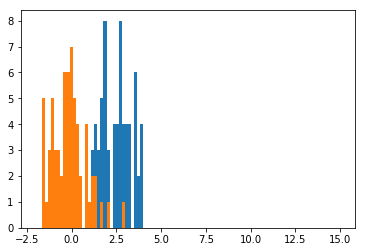

In [37]:
%matplotlib inline
import numpy as np
from scipy import optimize
import random
import matplotlib.pyplot as plt
import pandas

# These are the true parameters
p0 = 1.0
p1 = 1.0
sigma=1.0
fasigma=sigma *1.0  #  points are dispersed more than 1sigma
totalpoints=66
#pd.Series(100)  #pandas
li=np.random.random(totalpoints)*3+1
ga=np.random.normal(0.,  fasigma , totalpoints)
plt.hist( li,  bins = np.linspace(-2.0, 15, 100))
plt.hist( ga,  bins = np.linspace(-2.0, 15, 100))
plt.show()
#hist=np.histogram(a,   bins=np.linspace(0,6,num=61) )
#hist


In [38]:
# These are initial guesses for fits - randomized:
p0=np.array([ 5.0, 2.0 ])
pr=np.array([ x+np.random.random()*0.2-0.1 for x in p0 ])
#print(p0,pr)
####### numpy.ndarray
def f(x,p0,p1):
    #print(x, type(x), p0, type(p0), p1, type(p1))
    return p0*x+p1
xvals = np.linspace(0., 1, totalpoints )
yvals = f(xvals, *p0 )
print(yvals)
yrand=np.array([ y+g for y,g in zip(yvals,ga) ])
dyrand=np.array([ sigma for x in xvals ])

[ 2.          2.07692308  2.15384615  2.23076923  2.30769231  2.38461538
  2.46153846  2.53846154  2.61538462  2.69230769  2.76923077  2.84615385
  2.92307692  3.          3.07692308  3.15384615  3.23076923  3.30769231
  3.38461538  3.46153846  3.53846154  3.61538462  3.69230769  3.76923077
  3.84615385  3.92307692  4.          4.07692308  4.15384615  4.23076923
  4.30769231  4.38461538  4.46153846  4.53846154  4.61538462  4.69230769
  4.76923077  4.84615385  4.92307692  5.          5.07692308  5.15384615
  5.23076923  5.30769231  5.38461538  5.46153846  5.53846154  5.61538462
  5.69230769  5.76923077  5.84615385  5.92307692  6.          6.07692308
  6.15384615  6.23076923  6.30769231  6.38461538  6.46153846  6.53846154
  6.61538462  6.69230769  6.76923077  6.84615385  6.92307692  7.        ]


In [39]:
#print(xvals )
#print('origo==',yrand, type(yrand) )
np.savetxt('data/outx.txt' ,xvals.view(float) )
np.savetxt('data/outy.txt' ,yrand.view(float) )
xvals = np.loadtxt('data/outx.txt').view(float)
yrand = np.loadtxt('data/outy.txt').view(float)
#print('read ==',yrand, type(yrand) )


In [40]:
print('real     values',p0)# Generate data with a bit of randomness
print('starting values',pr)# Generate data with a bit of randomness
## this bitch sends x as numpy.ndarray
##  it determines number of parameters from the function definition :/
pfit, pcov = optimize.curve_fit(f, xvals, yrand,  sigma=dyrand )
print('fitted values  ',pfit )
print(pcov)
xi2=( (f(xvals, *pfit )-yrand)**2).sum()
dnf=(len(yrand)-len(pfit))
print('        Xi2=',xi2," dnf=",dnf, " xi2/dnf=",xi2/dnf)
if (len(yrand) > len(pfit)) and pcov is not None:
    s_sq = xi2/dnf
    if (s_sq>1.0):
        print('... i MuLtIpLy by',s_sq)
        pcov = pcov * xi2/dnf      
    else:
        print('... i DONT multiply by normalized xi2',s_sq)
        #pcov = pcov * s_sq        
    from scipy.stats import chi2
    mean, var, skew, kurt = chi2.stats(dnf, moments='mvsk')
    print( 'Xi2 1sig =( ', chi2.ppf( 0.33, dnf),'...', chi2.ppf( 0.66, dnf) ,')' )
    print( 'Xi2 2sig=( ', chi2.ppf( 0.05, dnf),'...', chi2.ppf( 0.95, dnf) ,')' )
    print( 'Xi2 3sig=( ', chi2.ppf( 0.01, dnf),'...', chi2.ppf( 0.99, dnf) ,')' )
else:
    pcov = np.inf
error=[]
print(pcov)

real     values [ 5.  2.]
starting values [ 4.98775559  1.91465326]
fitted values   [ 4.73033226  1.93287433]
[[ 0.17289904 -0.08644952]
 [-0.08644952  0.05807634]]
        Xi2= 62.7330916174  dnf= 64  xi2/dnf= 0.980204556522
... i DONT multiply by normalized xi2 0.980204556522
Xi2 1sig =(  58.5158873416 ... 68.0866751478 )
Xi2 2sig=(  46.5949052248 ... 83.6752607427 )
Xi2 3sig=(  40.648562829 ... 93.2168596602 )
[[ 0.17289904 -0.08644952]
 [-0.08644952  0.05807634]]


fitted values   [ 4.73033226  1.93287433]
delta  values= [0.41581130464138827, 0.24099034108467479]


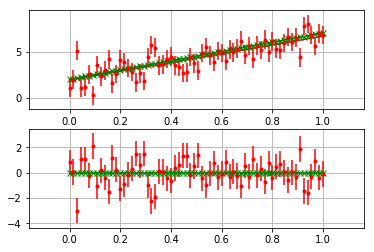

In [41]:
error=[]
for i in range(len(pfit)):
    try:
        error.append(np.absolute(pcov[i][i])**0.5)
    except:
        error.append( 0.00 )
print('fitted values  ',pfit )
print('delta  values=',error)

#plt.plot(xvals, yvals,'k. ')
plt.figure(1)
plt.subplot(211)

plt.plot(xvals, f(xvals,*pfit) ,"r")
plt.errorbar(xvals, yrand, fmt='r. ', yerr=dyrand)

plt.plot(xvals, f(xvals,*p0)   ,"gx-" ) # original theory
plt.grid()
x1,x2,y1,y2 = plt.axis()
plt.axis((x1-(x2-x1)*0.1,x2+(x2-x1)*0.1,y1  ,y2 ))
plt.subplot(212)
plt.plot(xvals, f(xvals,*p0)-yvals   ,"gx-" ) # original theory
plt.errorbar(xvals, f(xvals, *pfit)-yrand, fmt='r. ', yerr=dyrand)
#plt.tight_layout()
plt.grid()
x1,x2,y1,y2 = plt.axis()
plt.axis((x1-(x2-x1)*0.1,x2+(x2-x1)*0.1,y1  ,y2 ))
plt.show()



$\chi^2$ analysis
-------------

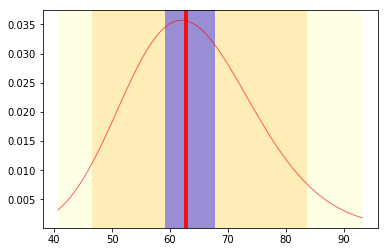

In [42]:
from scipy.stats import chi2
import matplotlib.pyplot as plt
dnf = (len(yrand)-len(pfit))
mean, var, skew, kurt = chi2.stats(dnf, moments='mvsk')
x = np.linspace(chi2.ppf(0.01, dnf), chi2.ppf(0.99, dnf), 100)
plt.plot(x, chi2.pdf(x, dnf), 'r-', lw=1, alpha=0.6, label='chi2 pdf')
(lll,hhh)=( chi2.ppf( 0.01, dnf), chi2.ppf( 0.99, dnf) )
plt.axvspan( lll,hhh, ymin=0,ymax=1, facecolor='yellow', alpha=0.1)
(ll,hh)=( chi2.ppf( 0.05, dnf), chi2.ppf( 0.95, dnf) )
plt.axvspan( ll,hh, ymin=0,ymax=1, facecolor='orange', alpha=0.2)
(l,h)=( chi2.ppf( 0.35, dnf), chi2.ppf( 0.65, dnf) )
plt.axvspan( l,h, ymin=0,ymax=1, facecolor='blue', alpha=0.4)
(l,h)=( xi2-(hh-ll)/100 ,xi2+(hh-ll)/100)
plt.axvspan( l,h, ymin=0,ymax=1, facecolor='red', alpha=0.9)
plt.show()